Dataset Information:
Aquaponics meta-data
The enclosed datasets are generated from freshwater aquaponics catfish ponds. The datasets are generated automatically at 5 seconds intervals using the following water quality sensors driven by the ESP 32 microcontroller: Dallas Instrument Temperature sensor (DS18B20), DF Robot Turbidity sensor, DF Robot Dissolved Oxygen sensor, DF Robot pH sensor V2.2, MQ-137 Ammonia sensor, and MQ-135 Nitrate sensor.
The project is funded by the Lacuna Award for Agriculture in Sub-Saharan Africa 2020 under the management of the Meridian Institute Colorado, USA.
The datasets and results in this section were sensor readings from June to mid-October 2021. There are 12 datasets, each from 12 aquaponics catfish ponds. Each of the 12 ponds IoT unit has six sensors (temperature, turbidity, dissolved oxygen, pH, ammonia, nitrate). As of the time of this report each unit has generated over 170,000 instances. The datasets are downloaded at intervals, cleaned, and labelled.

The attributes are:
1) Date/Time
2) Temperature
3) Turbidity
4) Dissolved Oxygen (DO)
5) pH
6) Ammonia
7) Nitrate
8) Population of fish in the pond
9)Length of Fish
10) Weight of Fish

Attribute Information:
All attributes are continuous

No statistics available, but suggest to standardise variables for certain uses (e.g. for use with classifiers that are NOT scale-invariant)

NOTE: Attributes 9 and 10 are class identifiers that can be used differently. For example, one may need to predict the length of the fish using the water quality parameters (2-7) or in addition to the population or stocking density (parameter 8). Similarly, the same can be done using the weight attribute.


    Describe the progress that you have made on your IoT System design diagram, including any issues that you have encountered.
    Describe the progress that you have made on your dataset exploration and cleaning, including any issues that you have encountered
    Describe the machine learning method you have chosen that will fulfill the deep learning requirement.
    Describe the machine learning method you have chosen that will fulfill the time series requirement.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw = pd.read_csv("IoTpond1.csv", delimiter = ",",index_col= 'entry_id')


In [3]:
df_raw.columns=['created_at', 'Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight']

In [4]:
df_raw.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
count,83126.000000,83126.000000,83126.000000,83126.000000,8.307400e+04,83126.000000,83126.0,83124.000000,83124.00000
mean,24.573376,87.490160,12.390251,7.518329,2.030817e+08,458.294408,50.0,16.414686,44.56847
std,0.861532,25.859375,12.518253,0.534787,7.866231e+09,338.313206,0.0,5.272244,33.21549
min,-127.000000,1.000000,0.007000,-0.586270,6.770000e-03,45.000000,50.0,7.110000,2.91000
25%,24.125000,91.000000,3.440000,7.153520,4.584200e-01,146.000000,50.0,11.790000,14.19000
50%,24.562500,100.000000,7.133000,7.357790,6.116600e-01,347.000000,50.0,18.080000,54.70000
75%,24.937500,100.000000,15.819000,7.838980,1.558803e+01,823.000000,50.0,21.000000,67.52000
max,27.750000,100.000000,41.046000,8.551670,4.270000e+11,1936.000000,50.0,33.450000,318.64000


There are some missing data - Ammonia & Fish_Length & Fish_Weight

In [5]:
df_raw.describe(include=object)

,created_at
count,83126
unique,83126
top,2021-06-19 00:00:05 CET
freq,1


In [6]:
df_raw.dtypes

created_at           object
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Population            int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

<AxesSubplot:>

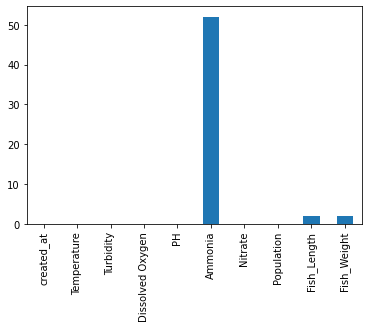

In [7]:
df_raw.isna().sum().plot.bar()

In [8]:
df_raw['Datetime'] = pd.to_datetime(df_raw.created_at,infer_datetime_format=True)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [9]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df_raw.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,83126.0000,83126.0000,83126.0000,83126.0000,83074.0000,83126.0000,83126.0000,83124.0000,83124.0000,83126
mean,24.5734,87.4902,12.3903,7.5183,203081663.9666,458.2944,50.0000,16.4147,44.5685,2021-07-21 16:09:26.662151424
min,-127.0000,1.0000,0.0070,-0.5863,0.0068,45.0000,50.0000,7.1100,2.9100,2021-06-19 00:00:05
25%,24.1250,91.0000,3.4400,7.1535,0.4584,146.0000,50.0000,11.7900,14.1900,2021-07-01 01:54:57.750000128
50%,24.5625,100.0000,7.1330,7.3578,0.6117,347.0000,50.0000,18.0800,54.7000,2021-07-27 17:36:44
75%,24.9375,100.0000,15.8190,7.8390,15.5880,823.0000,50.0000,21.0000,67.5200,2021-08-08 13:36:09
max,27.7500,100.0000,41.0460,8.5517,427000000000.0000,1936.0000,50.0000,33.4500,318.6400,2021-10-13 04:14:22
std,0.8615,25.8594,12.5183,0.5348,7866230860.5845,338.3132,0.0000,5.2722,33.2155,NaN


In [10]:
df_raw.dtypes

created_at                  object
Temperature                float64
Turbidity                    int64
Dissolved Oxygen           float64
PH                         float64
Ammonia                    float64
Nitrate                      int64
Population                   int64
Fish_Length                float64
Fish_Weight                float64
Datetime            datetime64[ns]
dtype: object

In [11]:
df=df_raw.drop(columns='created_at', axis=1)

In [12]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [13]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
entry_id,,,,,,,,,,,,
1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91,2021-06-19 00:00:05,2021-06-19,00:00:05
1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91,2021-06-19 00:01:02,2021-06-19,00:01:02
1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91,2021-06-19 00:01:22,2021-06-19,00:01:22
1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91,2021-06-19 00:01:44,2021-06-19,00:01:44
1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91,2021-06-19 00:02:07,2021-06-19,00:02:07


In [14]:
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()


<AxesSubplot:xlabel='Date'>

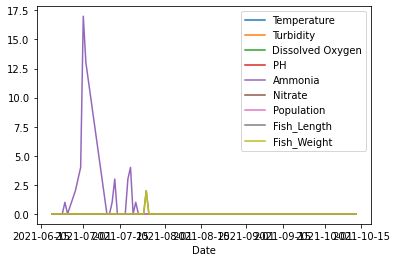

In [16]:
df_na.plot(x='Date', y=['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight'])


We can see that only Ammonia has missing data and Fish weight has missing data.We can either drop the whole Ammonia missing records or impute them with the last reading . Fish weight too.

In [17]:
df = df.dropna()
#clean up missing data here
# df.ffill(axis=0,inplace=True)

In [18]:
#use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,83072.0000,83072.0000,83072.0000,83072.0000,83072.0000,83072.0000,83072.0000,83072.0000,83072.0000,83072
mean,24.5733,87.4820,12.3932,7.5182,203086553.2590,458.5003,50.0000,16.4171,44.5849,2021-07-21 16:24:29.017490944
min,-127.0000,1.0000,0.0070,-0.5863,0.0068,45.0000,50.0000,7.1100,2.9100,2021-06-19 00:00:05
25%,24.1250,91.0000,3.4400,7.1535,0.4584,146.0000,50.0000,11.7900,14.1900,2021-07-01 01:53:49
50%,24.5625,100.0000,7.1330,7.3578,0.6117,347.0000,50.0000,18.0800,54.7000,2021-07-27 18:27:21
75%,24.9375,100.0000,15.8368,7.8390,15.5880,823.0000,50.0000,21.0000,67.5200,2021-08-08 13:41:48
max,27.7500,100.0000,41.0460,8.5517,427000000000.0000,1936.0000,50.0000,33.4500,318.6400,2021-10-13 04:14:22
std,0.8618,25.8658,12.5205,0.5349,7866325489.7603,338.3255,0.0000,5.2728,33.2187,NaN


array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

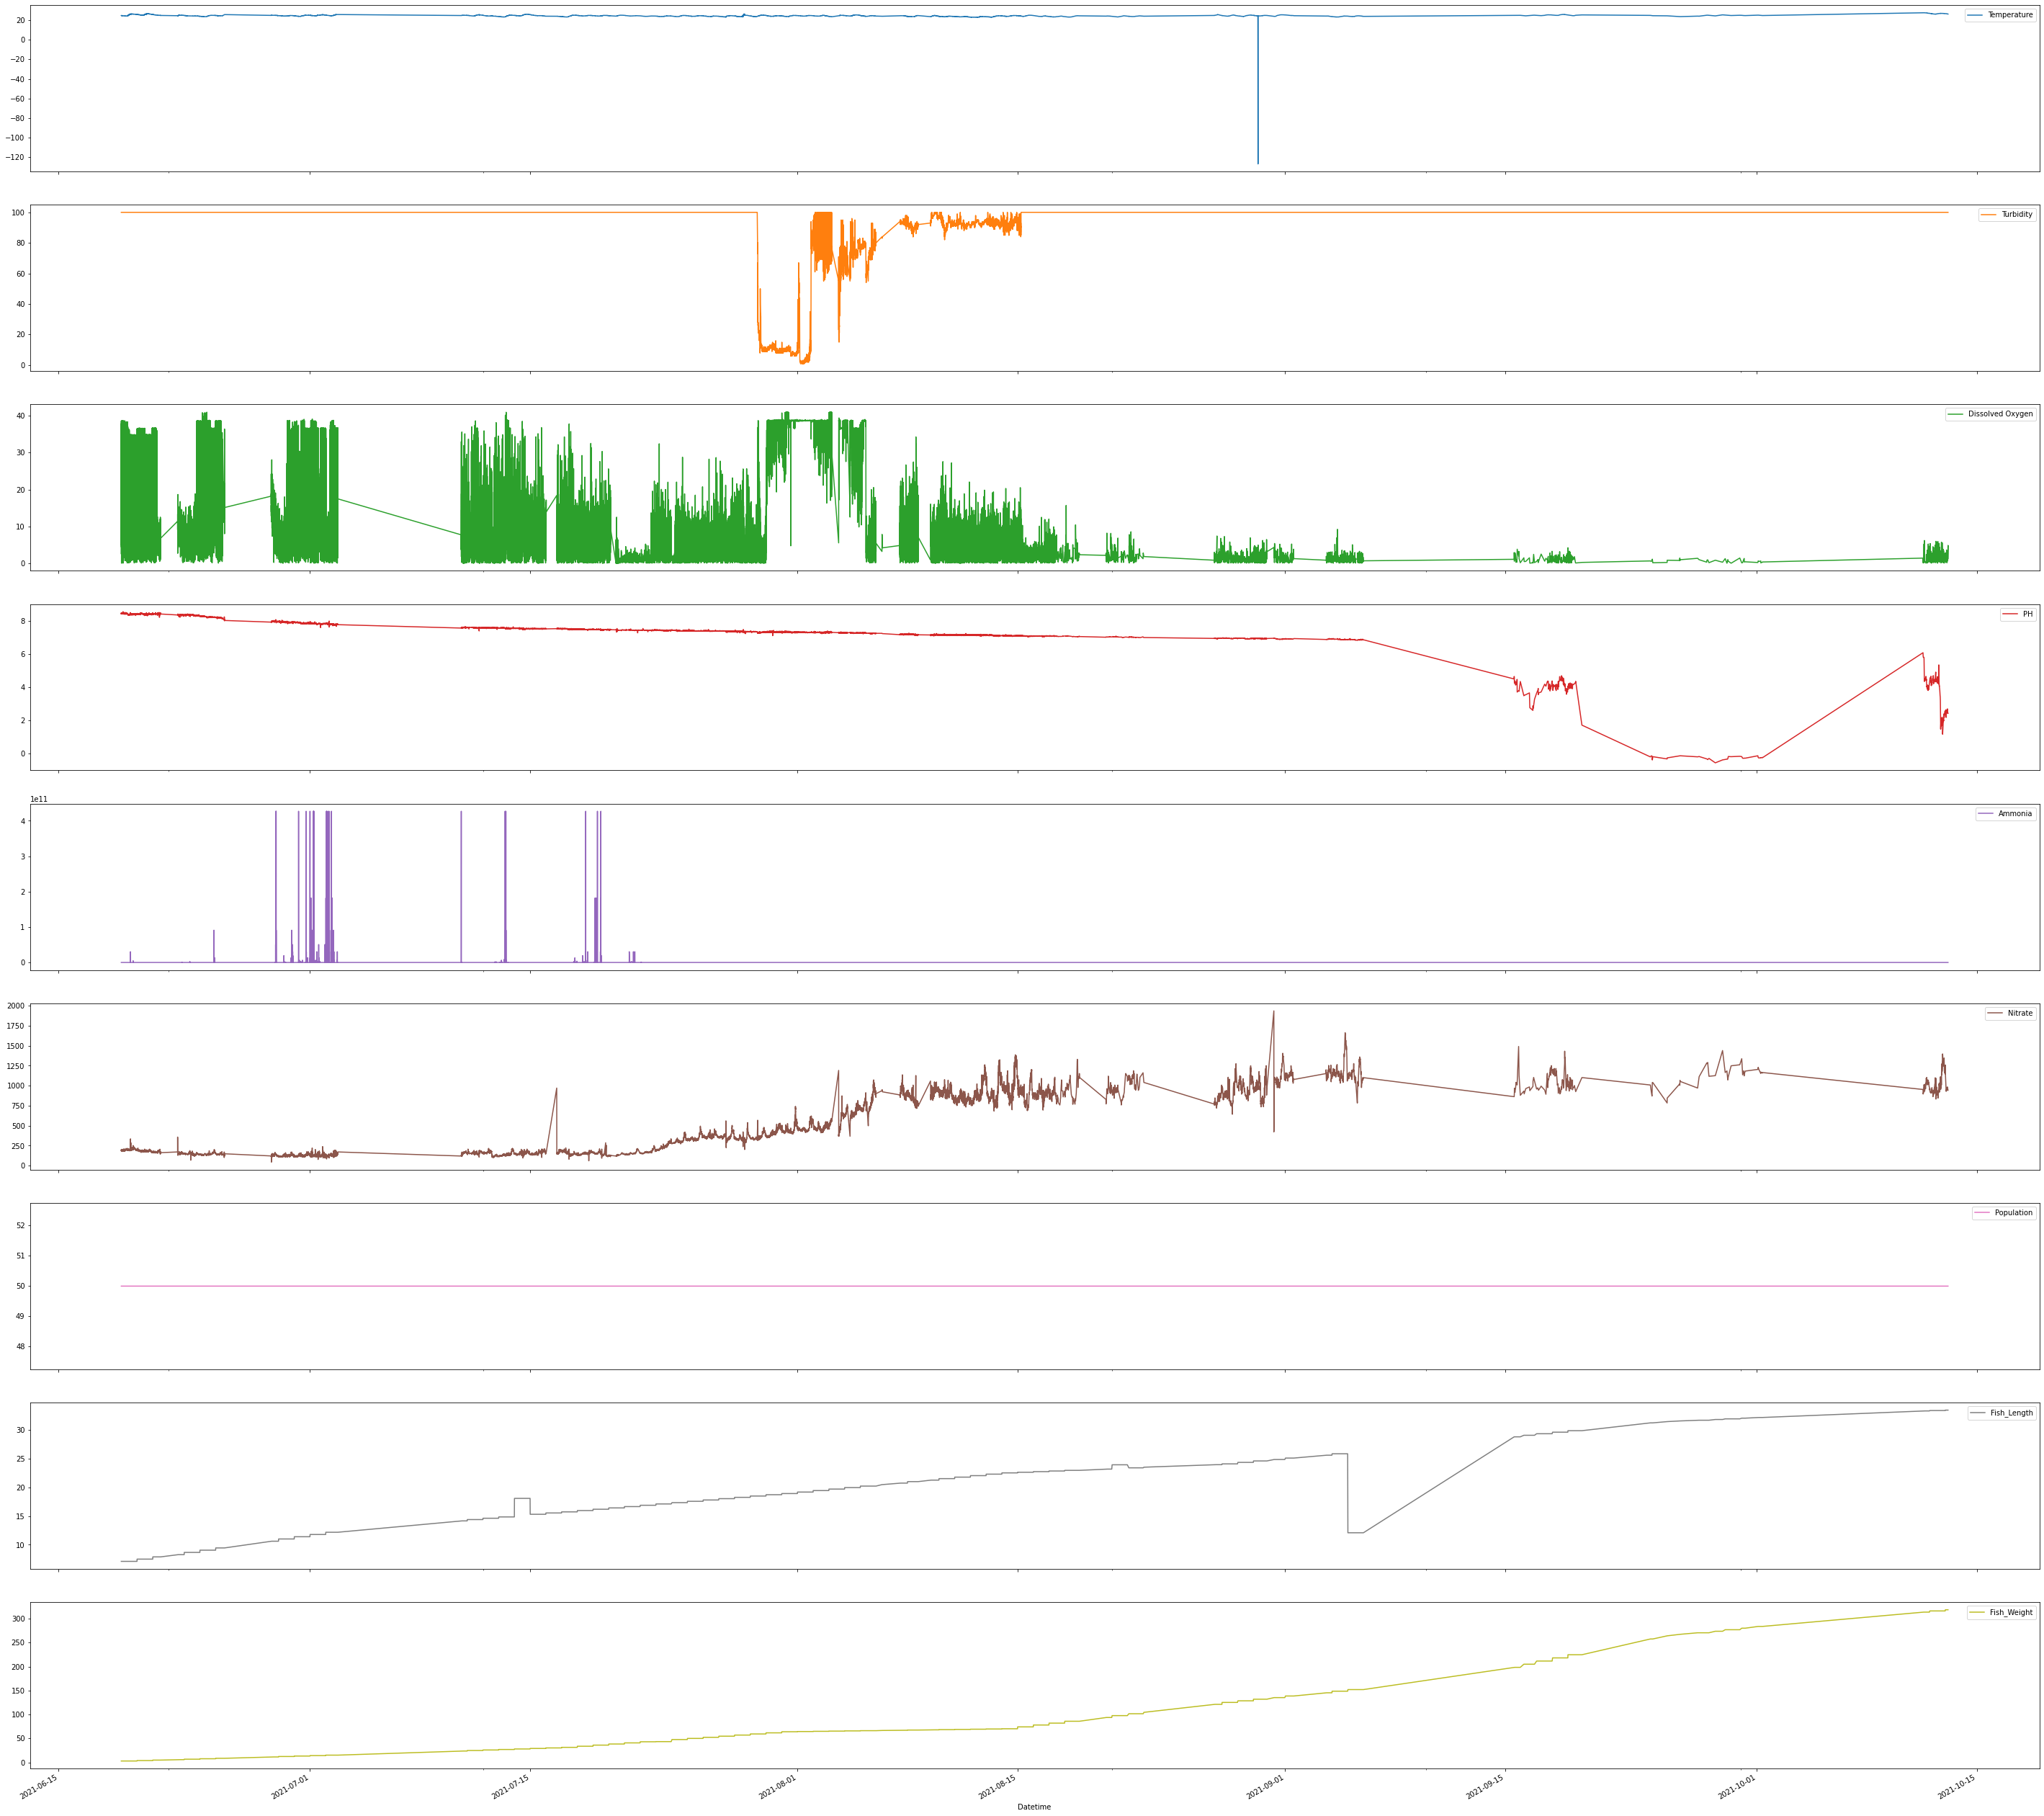

In [19]:
df.plot('Datetime',['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight'], subplots = True, figsize = (50,50))

Which player scored the most Points (PTS) Per Game? Here, we will return the entire row.
Lets find the reading with the maximum population

In [20]:

rows_with_max_len=df[df.Fish_Length == df.Fish_Length.max()]


In [21]:
rows_with_max_len.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
count,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.0,19.00,1.900000e+01
mean,26.641447,100.0,1.394947,2.480257,7.242070,987.000000,50.0,33.45,3.186400e+02
std,0.134761,0.0,1.215000,0.108106,2.399564,79.342436,0.0,0.00,5.840106e-14
min,26.375000,100.0,0.144000,2.155570,2.532870,929.000000,50.0,33.45,3.186400e+02
25%,26.562500,100.0,0.570500,2.441550,5.664875,945.000000,50.0,33.45,3.186400e+02
50%,26.625000,100.0,1.020000,2.482410,6.638470,963.000000,50.0,33.45,3.186400e+02
75%,26.750000,100.0,1.720500,2.536880,9.630505,982.000000,50.0,33.45,3.186400e+02
max,26.812500,100.0,4.850000,2.677600,11.203710,1258.000000,50.0,33.45,3.186400e+02


In [23]:
rows_with_max_len.PH

entry_id
246832    2.44609
246857    2.50057
246929    2.62313
246949    2.49149
246996    2.15557
247053    2.45063
247086    2.39162
247090    2.43701
247137    2.53688
247147    2.57320
247152    2.53688
247174    2.48241
247180    2.50964
247192    2.47333
247201    2.56412
247273    2.67760
247336    2.45063
247402    2.41885
247405    2.40524
Name: PH, dtype: float64

we see that when the pH is around 2.4 +- 0.1, our weight of the fish is maximim

In [24]:
rows_with_max_len.Ammonia

entry_id
246832     2.53287
246857     5.61209
246929     6.44293
246949     9.99962
246996    11.20371
247053     6.91729
247086     6.63847
247090     9.81236
247137     5.44727
247147     5.71766
247152     9.44865
247174     5.09413
247180     7.62495
247192     6.09197
247201     5.91282
247273     4.21414
247336     8.18873
247402    10.62411
247405    10.07556
Name: Ammonia, dtype: float64

In [25]:
rows_with_turbidity_less_than_100=df[df.Turbidity < 100]


In [26]:
rows_with_turbidity_less_than_100.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
count,36272.000000,36272.000000,36272.000000,36272.000000,36272.000000,36272.000000,36272.0,36272.000000,36272.000000
mean,24.222158,71.330696,16.425564,7.192779,23.139765,750.900640,50.0,20.742218,66.876591
std,0.519568,32.699140,15.526121,0.084790,3246.535986,219.504663,0.0,1.326805,2.938196
min,23.000000,1.000000,0.008000,7.044570,0.051790,314.000000,50.0,18.490000,59.360000
25%,23.812500,68.000000,3.463000,7.121740,0.424970,528.000000,50.0,19.700000,65.320000
50%,24.250000,90.000000,7.302000,7.158060,0.661970,820.000000,50.0,21.000000,67.520000
75%,24.625000,93.000000,36.716000,7.285160,3.694910,902.000000,50.0,21.780000,68.840000
max,25.562500,99.000000,41.046000,7.421340,617811.750000,1387.000000,50.0,22.630000,74.130000


In [27]:
rows_with_turbidity_less_than_100.head(10)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
entry_id,,,,,,,,,,,,
109520,24.125,73,12.729,7.28062,6.46187,569,50,18.49,59.36,2021-07-29 11:20:33,2021-07-29,11:20:33
109521,24.125,75,14.064,7.28062,16.36979,483,50,18.49,59.36,2021-07-29 11:20:53,2021-07-29,11:20:53
109524,24.125,78,13.160,7.27154,19.70121,422,50,18.49,59.36,2021-07-29 11:21:52,2021-07-29,11:21:52
109525,24.125,78,21.722,7.27154,17.47865,378,50,18.49,59.36,2021-07-29 11:22:49,2021-07-29,11:22:49
109526,24.125,79,7.945,7.26700,19.45768,377,50,18.49,59.36,2021-07-29 11:23:09,2021-07-29,11:23:09
109527,24.125,79,10.514,7.27154,18.43942,374,50,18.49,59.36,2021-07-29 11:23:29,2021-07-29,11:23:29
109528,24.125,80,11.731,7.26700,20.62289,368,50,18.49,59.36,2021-07-29 11:23:49,2021-07-29,11:23:49
109529,24.125,80,12.610,7.26700,24.49462,355,50,18.49,59.36,2021-07-29 11:24:46,2021-07-29,11:24:46
109530,24.125,80,19.009,7.26700,27.24046,352,50,18.49,59.36,2021-07-29 11:25:06,2021-07-29,11:25:06


Data Covariance and Correlation

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical left == right == 50.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical bottom == top == 50.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical left == right == 50.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


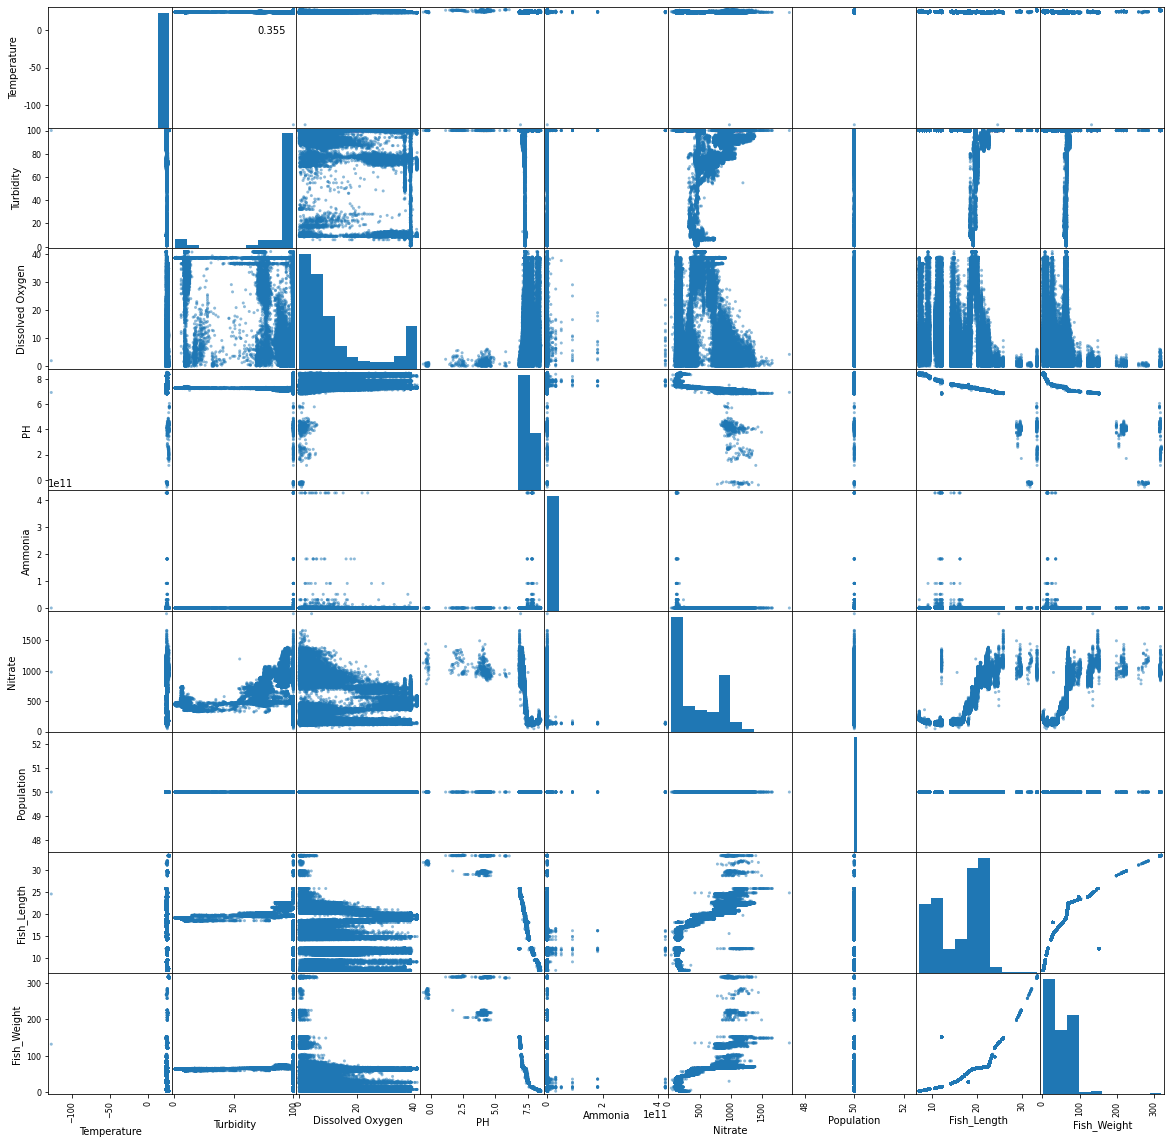

In [28]:
axes = pd.plotting.scatter_matrix(df[['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight']], alpha=0.5,figsize= [20,20])
corr = df[['Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
    plt.show()

In [29]:


import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
corr = df.corr()
corr

<ipython-input-30-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
Temperature,1.000000,0.074839,0.098510,0.302384,0.004518,-0.372936,NaN,-0.420237,-0.296264
Turbidity,0.074839,1.000000,-0.623280,0.222268,0.012495,-0.124568,NaN,-0.280237,-0.284130
Dissolved Oxygen,0.098510,-0.623280,1.000000,0.005422,-0.008909,-0.101778,NaN,0.017412,0.042066
PH,0.302384,0.222268,0.005422,1.000000,0.011413,-0.695450,NaN,-0.894837,-0.919021
Ammonia,0.004518,0.012495,-0.008909,0.011413,1.000000,-0.024755,NaN,-0.018230,-0.020203
Nitrate,-0.372936,-0.124568,-0.101778,-0.695450,-0.024755,1.000000,NaN,0.839395,0.795957
Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fish_Length,-0.420237,-0.280237,0.017412,-0.894837,-0.018230,0.839395,NaN,1.000000,0.899394
Fish_Weight,-0.296264,-0.284130,0.042066,-0.919021,-0.020203,0.795957,NaN,0.899394,1.000000


<AxesSubplot:>

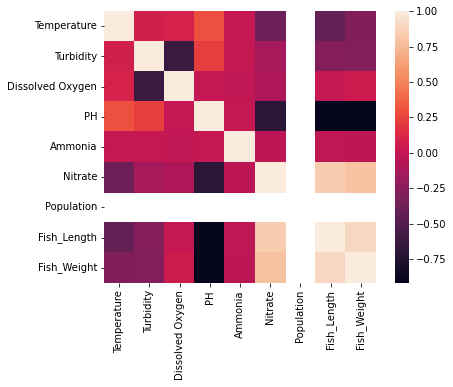

In [32]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

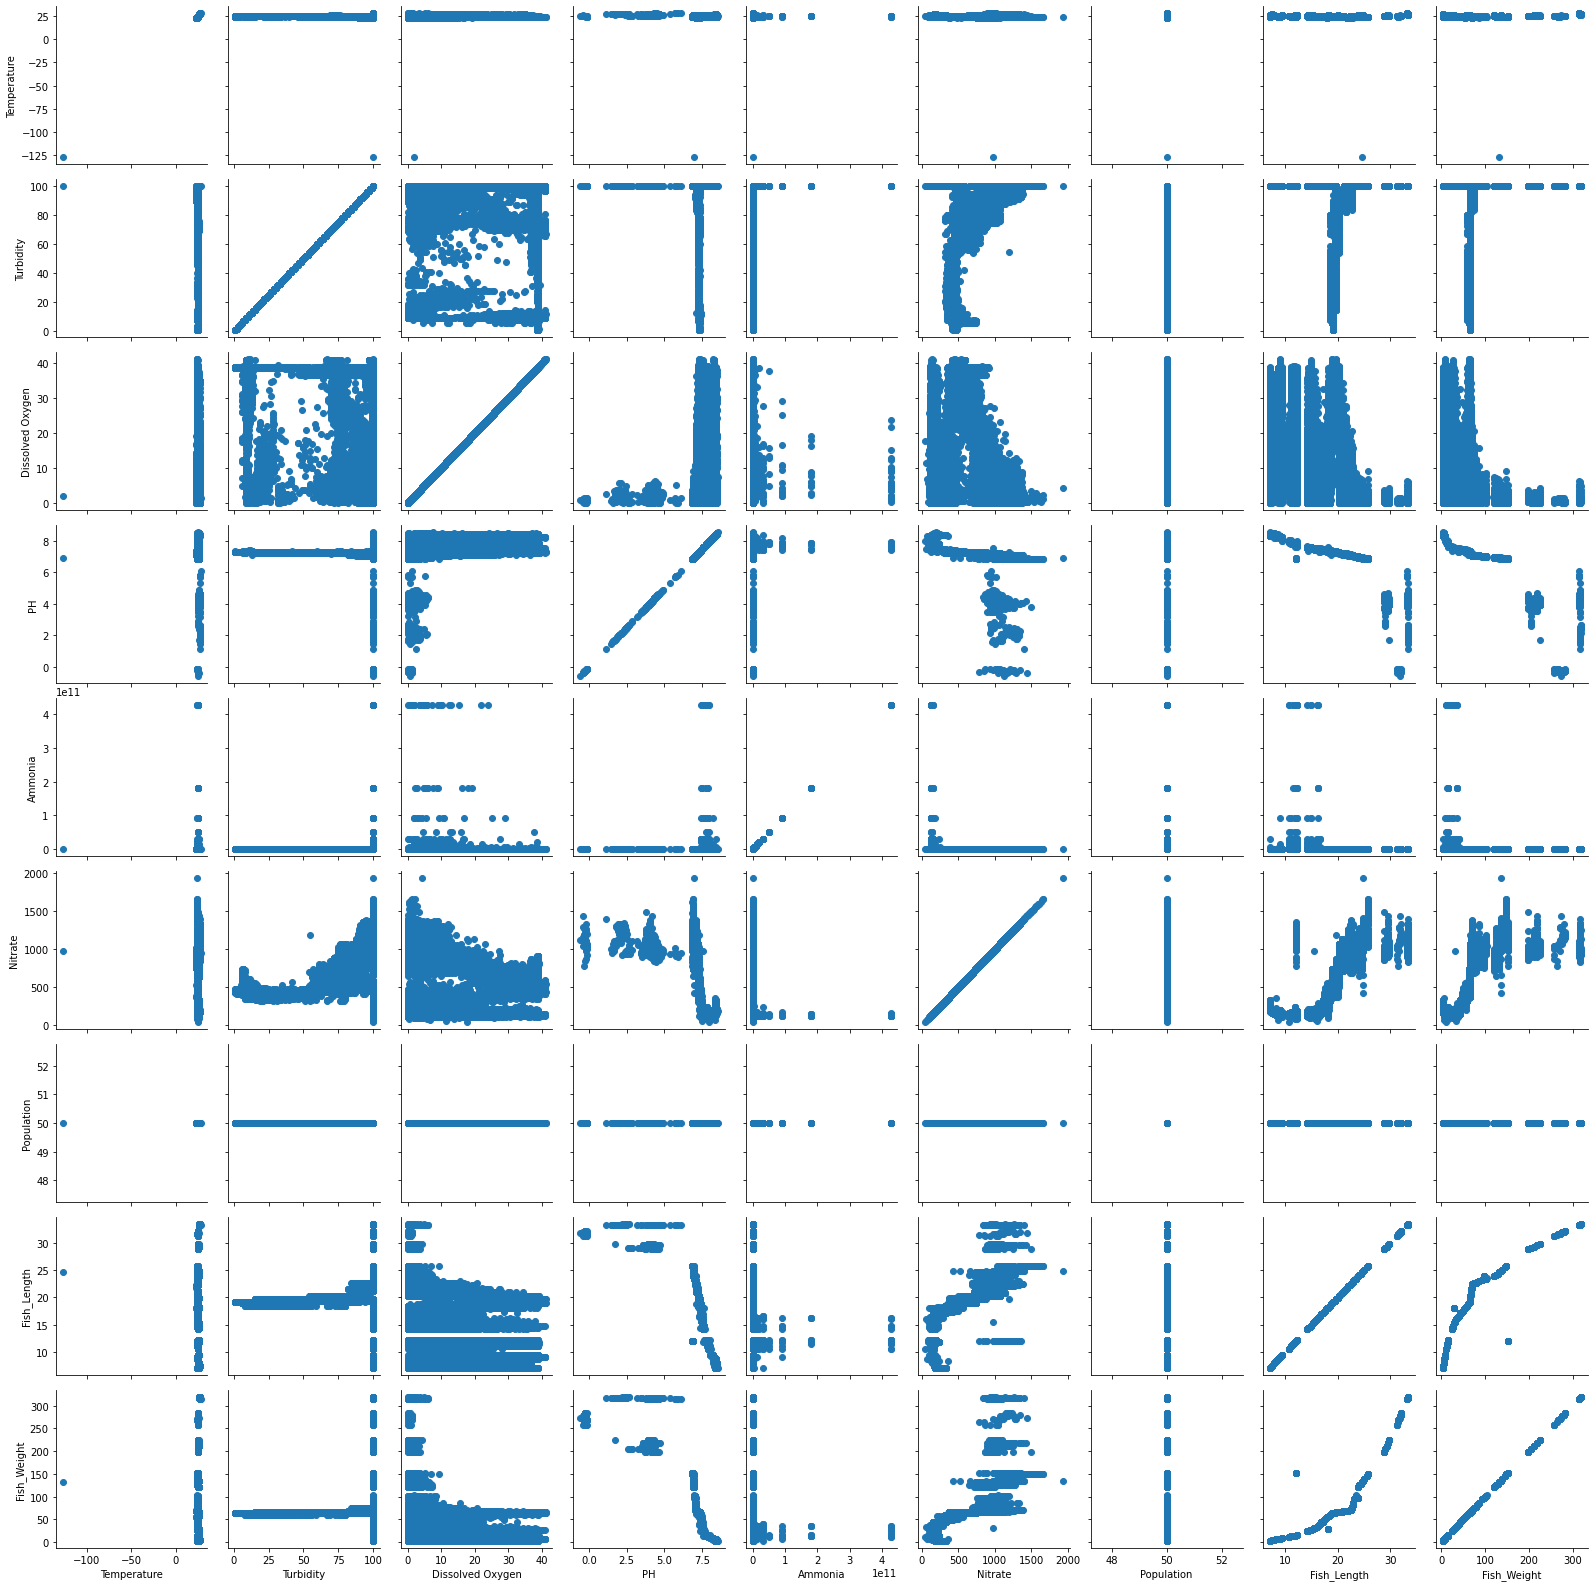

In [33]:
g = sns.PairGrid(df)
g.map(plt.scatter)